In [1]:
import sys; sys.path.append('../')
import warnings
warnings.filterwarnings('ignore')

from src.data_loader import load_data

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

In [2]:
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('seaborn-whitegrid')

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier, RandomForestClassifier, VotingClassifier)
from sklearn.svm import SVC
models = [
    LinearDiscriminantAnalysis, KNeighborsClassifier, GaussianNB,
    DecisionTreeClassifier, ExtraTreeClassifier, AdaBoostClassifier, BaggingClassifier,
    ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, SVC
]

In [4]:
import smote_variants as sv

#From https://smote-variants.readthedocs.io/en/latest/ranking.html
oversamplers = [
    sv.polynom_fit_SMOTE, sv.ProWSyn, sv.SMOTE_IPF, sv.Lee, sv.SMOBD, sv.G_SMOTE,
    sv.CCR, sv.LVQ_SMOTE, sv.Assembled_SMOTE, sv.SMOTE_TomekLinks
]

## Cluster Oversampling using SMOTE

In [5]:
clusters, _ = load_data('../data/all_clusters.txt')
clusters = clusters.drop(['file_origin', 'file_destination'], axis=1).reset_index()

In [6]:
#Delete columns with one value
for col in clusters.columns:
    if len(clusters[col].unique()) == 1:
        clusters.drop(col,inplace=True,axis=1)

        #Delete columns with one value
for col in clusters.columns:
    if len(clusters[col].unique()) == 1:
        clusters.drop(col,inplace=True,axis=1)

clusters['classification'] = (
    ((clusters['classification'] != 'Vegetation') & (clusters['classification'] != 'Limit_effect'))
)

In [7]:
data = clusters.replace('None', np.nan).dropna(axis=0)

X = data.drop('classification', axis=1)
X = (X - X.mean()) / X.std()
y = data['classification']

In [9]:
bar_plots = {}
for Oversampler in oversamplers:
    splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
    bar_plot = []
    for train_index, test_index in splitter.split(X, y):
        X_train, y_train = Oversampler().sample(X.iloc[train_index].values, y.iloc[train_index].values)
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]

        performances = []
        for Model in models:
            try:
                model = Model()
                model.fit(X_train, y_train)

                y_pred = model.predict(X_test)
                performances.append([
                    Model.__name__, len(y_pred),
                    sum(y_pred), sum(y_test),
                    sum(y_test & y_pred),
                    X_test[~y_pred & y_test]['volume'],
                    classification_report(y_test, y_pred, output_dict=True)
                ])
            except Exception as e:
                print(e)
        bar_plot.append(performances)
    bar_plots[Oversampler.__name__] = bar_plot

2019-12-03 11:40:53,585:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:41:02,658:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:41:11,660:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:41:20,218:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:41:28,891:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:41:37,794:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:41:46,613:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:41:55,449:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:42:04,130:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:42:12,216:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:42:20,894:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:42:32,103:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:42:43,144:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:42:53,995:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:43:05,062:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:43:16,041:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:43:26,461:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:43:37,050:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:43:47,639:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:43:58,111:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:44:08,738:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort=False,\n                       random_state=2, splitter='best'), 'random_state': None}")
2019-12-03 11:44:08,738:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:44:13,510:INFO:SMOTE_IPF: Removing 0 elements
2019-12-03 11:44:18,264:

__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:44:32,897:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort=False,\n                       random_state=2, splitter='best'), 'random_state': None}")
2019-12-03 11:44:32,898:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:44:38,031:INFO:SMOTE_IPF: Removing 0 elements
2019-12-03 11:44:43,147:

__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:44:58,255:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort=False,\n                       random_state=2, splitter='best'), 'random_state': None}")
2019-12-03 11:44:58,255:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:45:03,330:INFO:SMOTE_IPF: Removing 0 elements
2019-12-03 11:45:08,362:

__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:45:23,432:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort=False,\n                       random_state=2, splitter='best'), 'random_state': None}")
2019-12-03 11:45:23,433:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:45:28,256:INFO:SMOTE_IPF: Removing 0 elements
2019-12-03 11:45:33,054:

__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:45:47,673:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort=False,\n                       random_state=2, splitter='best'), 'random_state': None}")
2019-12-03 11:45:47,673:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:45:52,635:INFO:SMOTE_IPF: Removing 0 elements
2019-12-03 11:45:57,590:

__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:46:12,674:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort=False,\n                       random_state=2, splitter='best'), 'random_state': None}")
2019-12-03 11:46:12,675:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:46:17,090:INFO:SMOTE_IPF: Removing 0 elements
2019-12-03 11:46:21,488:

__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:46:35,310:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort=False,\n                       random_state=2, splitter='best'), 'random_state': None}")
2019-12-03 11:46:35,310:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:46:39,879:INFO:SMOTE_IPF: Removing 0 elements
2019-12-03 11:46:44,430:

__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:46:58,774:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort=False,\n                       random_state=2, splitter='best'), 'random_state': None}")
2019-12-03 11:46:58,774:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:47:03,144:INFO:SMOTE_IPF: Removing 0 elements
2019-12-03 11:47:07,481:

__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:47:21,250:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort=False,\n                       random_state=2, splitter='best'), 'random_state': None}")
2019-12-03 11:47:21,251:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:47:25,109:INFO:SMOTE_IPF: Removing 0 elements
2019-12-03 11:47:28,951:

__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:47:41,895:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort=False,\n                       random_state=2, splitter='best'), 'random_state': None}")
2019-12-03 11:47:41,895:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:47:45,930:INFO:SMOTE_IPF: Removing 0 elements
2019-12-03 11:47:49,945:

__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:48:03,068:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:48:15,837:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:48:28,706:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:48:41,462:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:48:54,356:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:49:07,169:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:49:19,786:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:49:32,484:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:49:45,042:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:49:57,520:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:50:09,948:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:50:19,856:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:50:30,351:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:50:40,479:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:50:50,801:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:51:01,174:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:51:10,973:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:51:20,711:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:51:30,452:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:51:39,825:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:51:49,532:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:51:59,755:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:52:09,934:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:52:19,770:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:52:29,967:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:52:39,832:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:52:49,587:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:52:59,514:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:53:09,358:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:53:19,147:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:53:28,961:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:53:42,571:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:53:56,459:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:54:10,246:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:54:24,281:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:54:38,087:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:54:51,960:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:55:05,551:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:55:19,510:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:55:33,629:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:55:47,532:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:55:56,461:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:56:05,620:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:56:14,539:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:56:23,173:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:56:31,815:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:56:40,289:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:56:49,020:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:56:57,905:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:57:06,766:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:57:15,622:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:57:25,640:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:57:35,720:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:57:45,722:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:57:56,112:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:58:06,564:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:58:16,515:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:58:26,633:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:58:36,500:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:58:46,048:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1, 'random_state': None}")


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:58:55,580:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-03 11:58:55,581:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:58:55,598:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:59:07,221:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-03 11:59:07,222:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:59:07,239:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:59:18,952:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-03 11:59:18,953:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:59:18,971:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:59:30,833:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-03 11:59:30,834:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:59:30,851:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:59:42,527:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-03 11:59:42,527:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:59:42,545:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 11:59:54,241:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-03 11:59:54,242:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 11:59:54,259:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 12:00:05,545:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-03 12:00:05,545:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 12:00:05,563:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 12:00:17,123:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-03 12:00:17,123:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 12:00:17,141:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 12:00:28,507:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-03 12:00:28,508:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 12:00:28,526:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


__init__() missing 1 required positional argument: 'estimators'


2019-12-03 12:00:39,286:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-03 12:00:39,286:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-97nGMN1k/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-03 12:00:39,303:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


__init__() missing 1 required positional argument: 'estimators'


In [10]:
THRESHOLD = 0.7

def extract_statistics(bar_plot):
    ground_truth = bar_plot[0][0][3]
    tp_tfs, tp_tfs_err, tps, tps_err, f1s, f1s_err = [], [], [], [], [], []
    for model_index, model in enumerate([e[0] for e in bar_plot[0]]):
        tp_fp, tp, f1 = [], [], []
        for split in bar_plot:
            tp_fp.append(split[model_index][2])
            tp.append(split[model_index][4])
            f1.append(split[model_index][-1]['True']['f1-score']) 

        tp_tfs.append(np.array(tp_fp).mean())
        tp_tfs_err.append(np.array(tp_fp).std())
        tps.append(np.array(tp).mean())
        tps_err.append(np.array(tp).std())
        
        if (tps[-1] / ground_truth) >= THRESHOLD:
            f1s.append(np.array(f1).mean())
            f1s_err.append(np.array(f1).std()) 
        else:
            f1s.append(0)
            f1s_err.append(0)
    return tp_tfs, tp_tfs_err, tps, tps_err, f1s, f1s_err

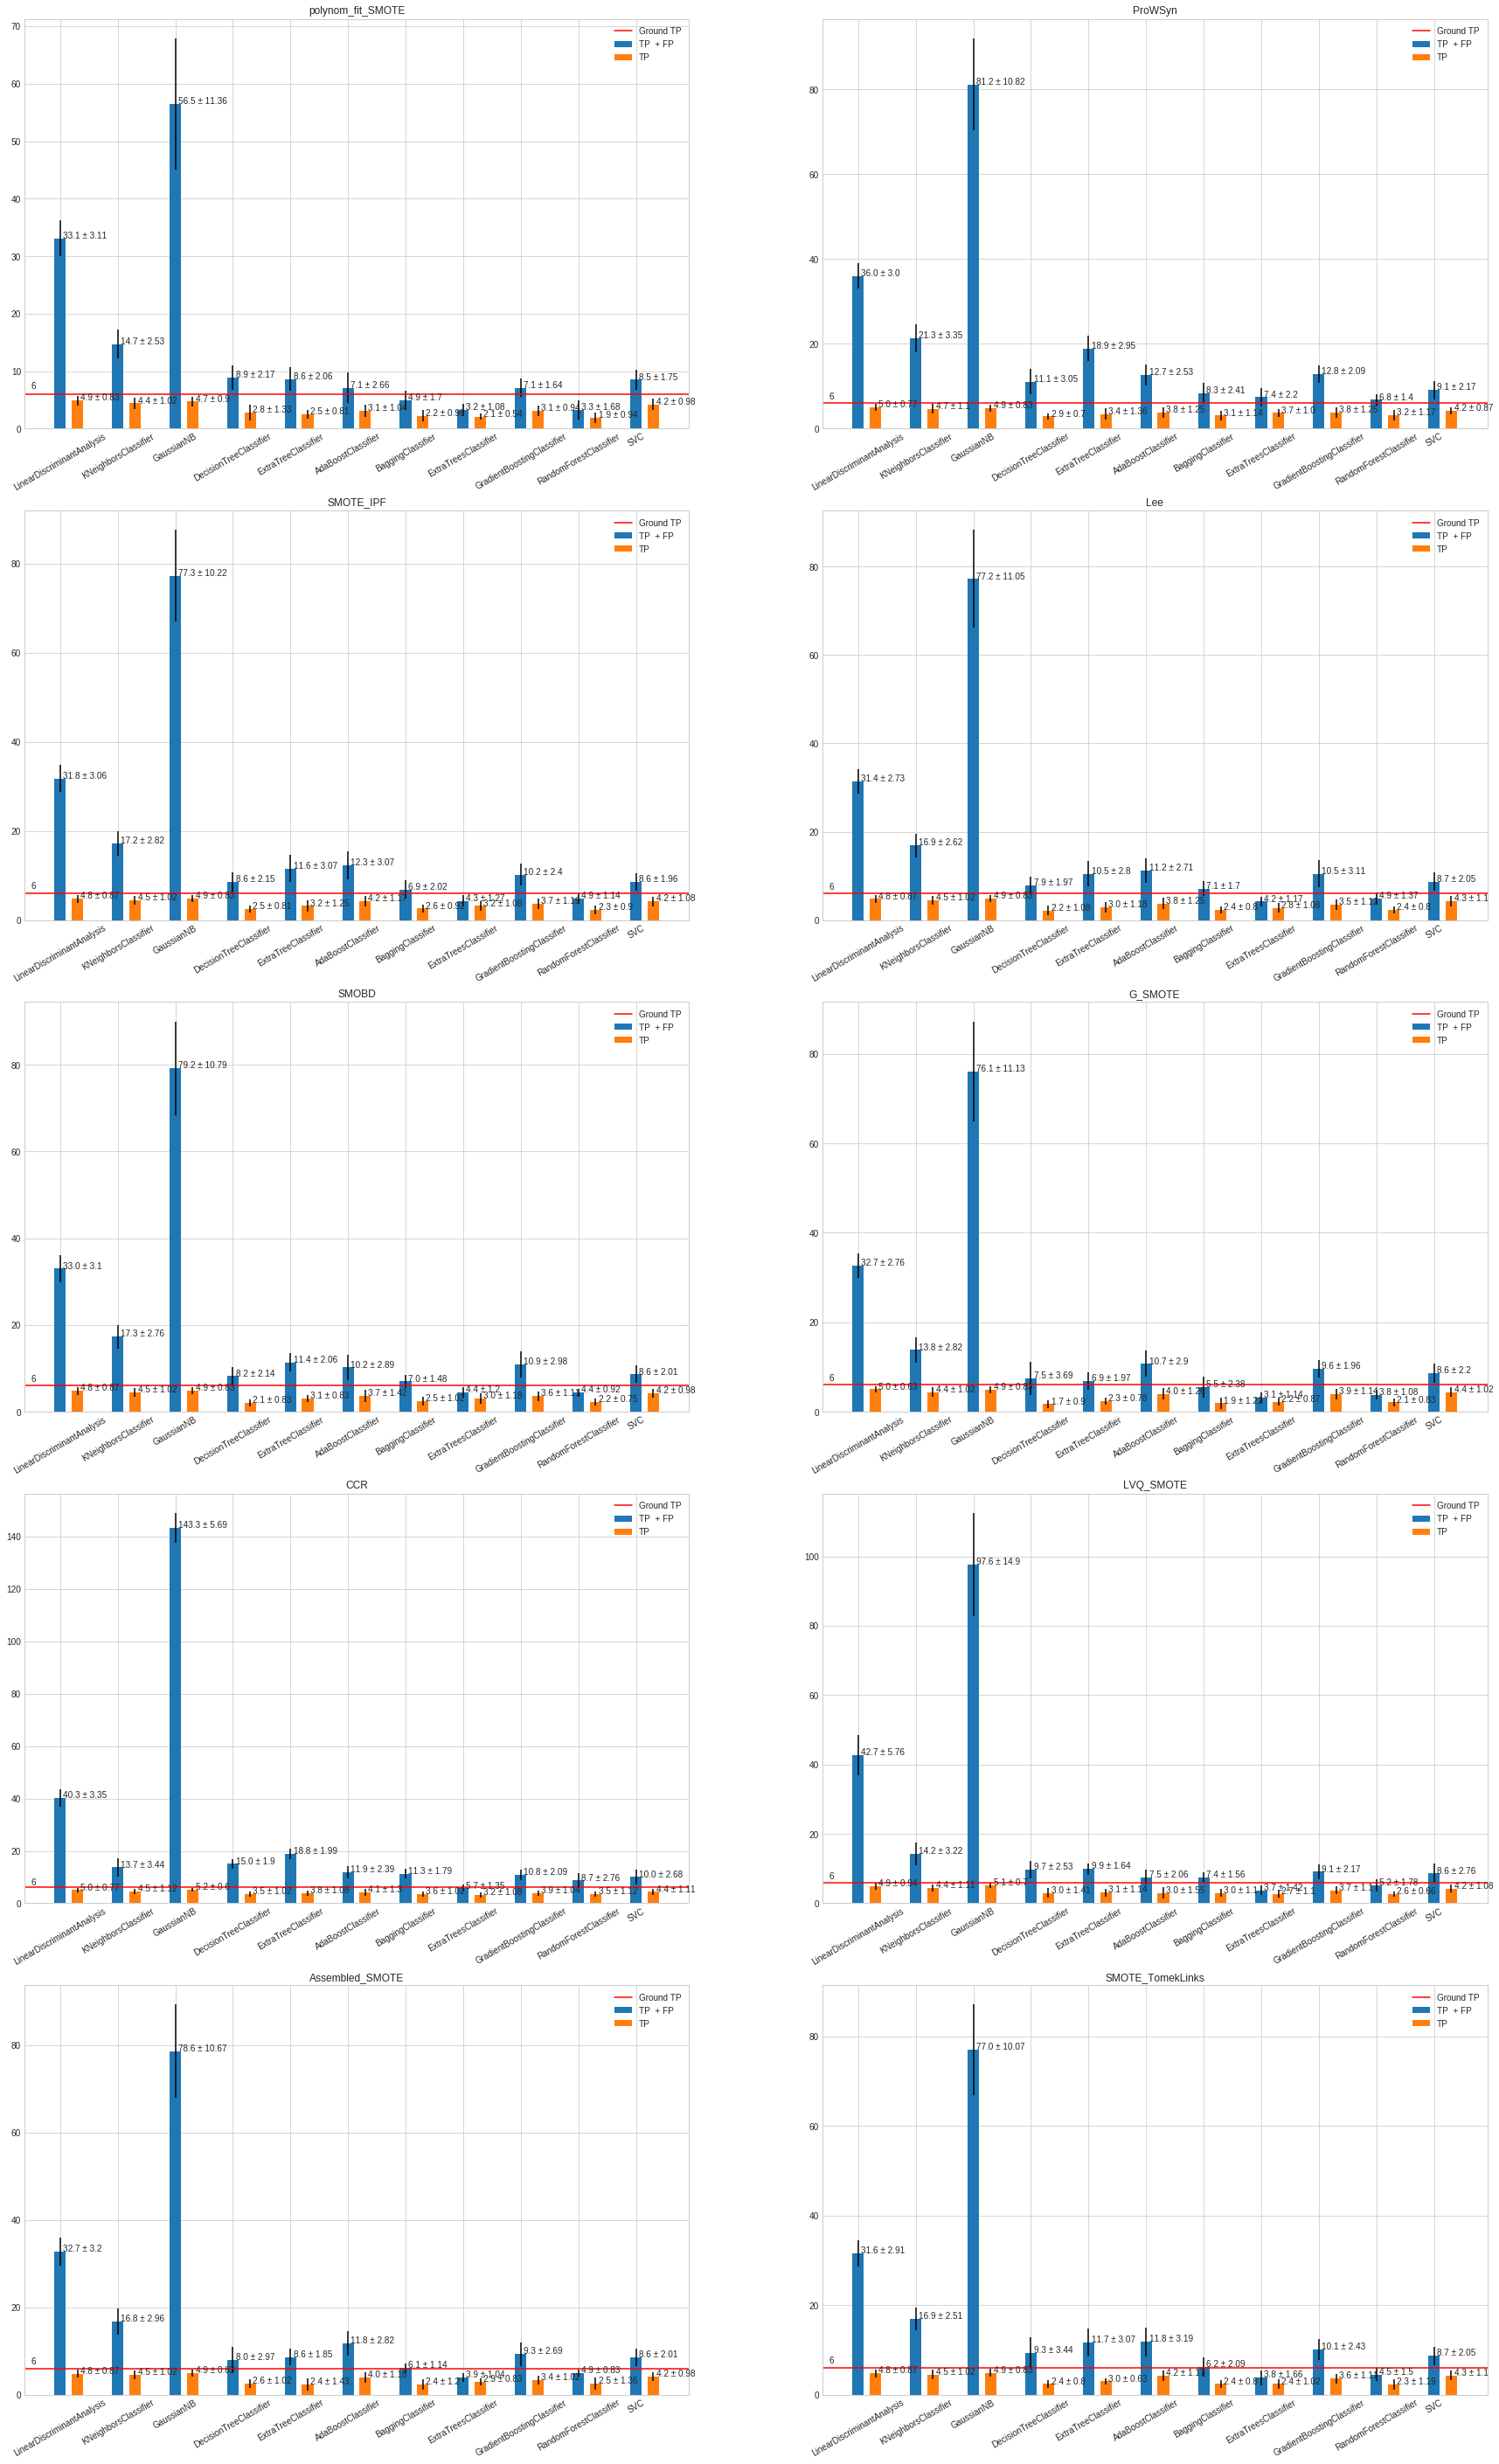

In [11]:
from src.utils.visualization import plot_trues
plt.rcParams["figure.figsize"] = (30,50)

for i, bar_plot in enumerate(bar_plots):
    name = bar_plot
    bar_plot = bar_plots[name]
    plt.subplot(5,2,i+1)
    plt.title(name)
    
    tp_tfs, tp_tfs_err, tps, tps_err, *_ = extract_statistics(bar_plot)
    ground_truth = bar_plot[0][0][3]
    labels = [e[0] for e in bar_plot[0]]
    plot_trues(
        tps=tps, tps_tfs=tp_tfs, gt=ground_truth,
        labels=labels, tps_err=tps_err, tps_tfs_err=tp_tfs_err
    )

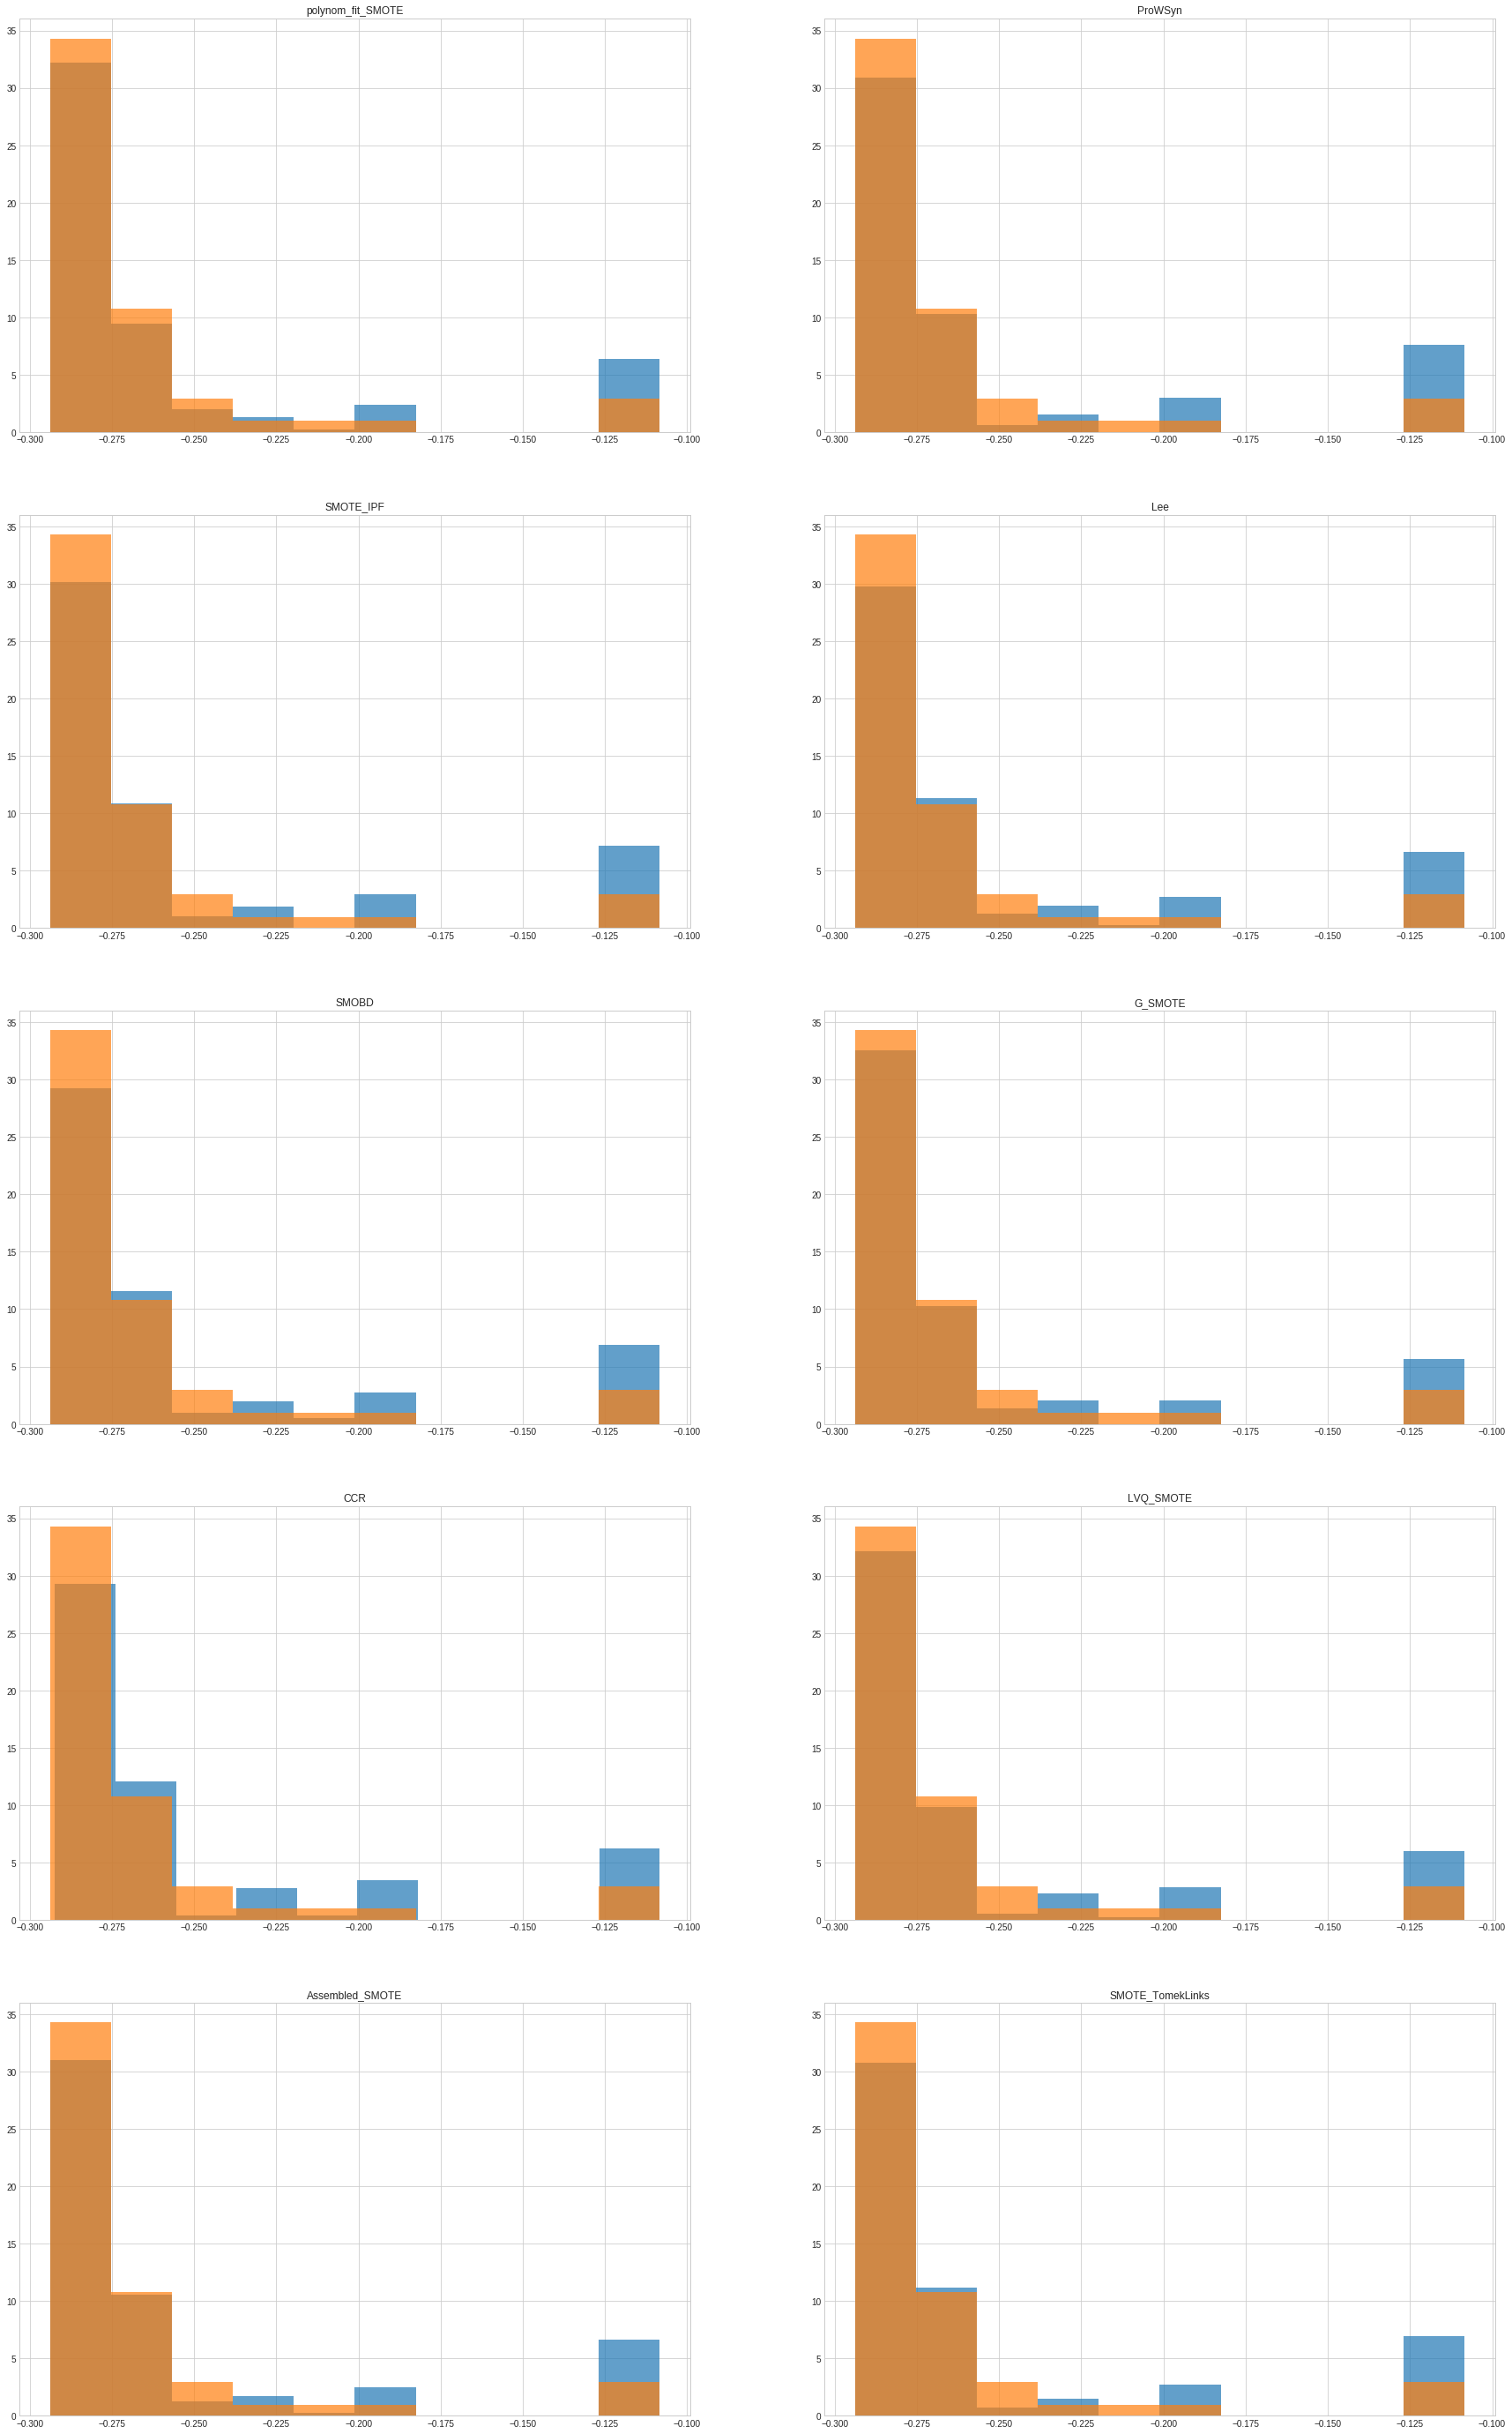

In [42]:
for i, bar_plot in enumerate(bar_plots):
    plt.subplot(5,2,i+1)
    volumes = []
    plt.title(bar_plot)
    bar_plot = bar_plots[bar_plot]
    [[[volumes.append(volume) for volume in method[-2].values] for method in split]for split in bar_plot]
    plt.hist(volumes, normed=True, alpha=0.7)
    plt.hist(X[y]['volume'], normed=True, alpha=0.7)

polynom_fit_SMOTE (SVC): 0.6007051282051282 +/- 0.1373442725818786
ProWSyn (SVC): 0.5773598950069538 +/- 0.11148938978335923
SMOTE_IPF (SVC): 0.5937402793285146 +/- 0.1351803863419912
Lee (SVC): 0.6029069459951812 +/- 0.13387503940239076
SMOBD (SVC): 0.594573612661848 +/- 0.1268699147745886
G_SMOTE (SVC): 0.6217213178977884 +/- 0.12107295372714438
CCR (SVC): 0.5718332596196374 +/- 0.14899794832939353
LVQ_SMOTE (SVC): 0.5944676960466435 +/- 0.11800284782542983
Assembled_SMOTE (SVC): 0.594573612661848 +/- 0.1268699147745886
SMOTE_TomekLinks (SVC): 0.6029069459951812 +/- 0.13387503940239076


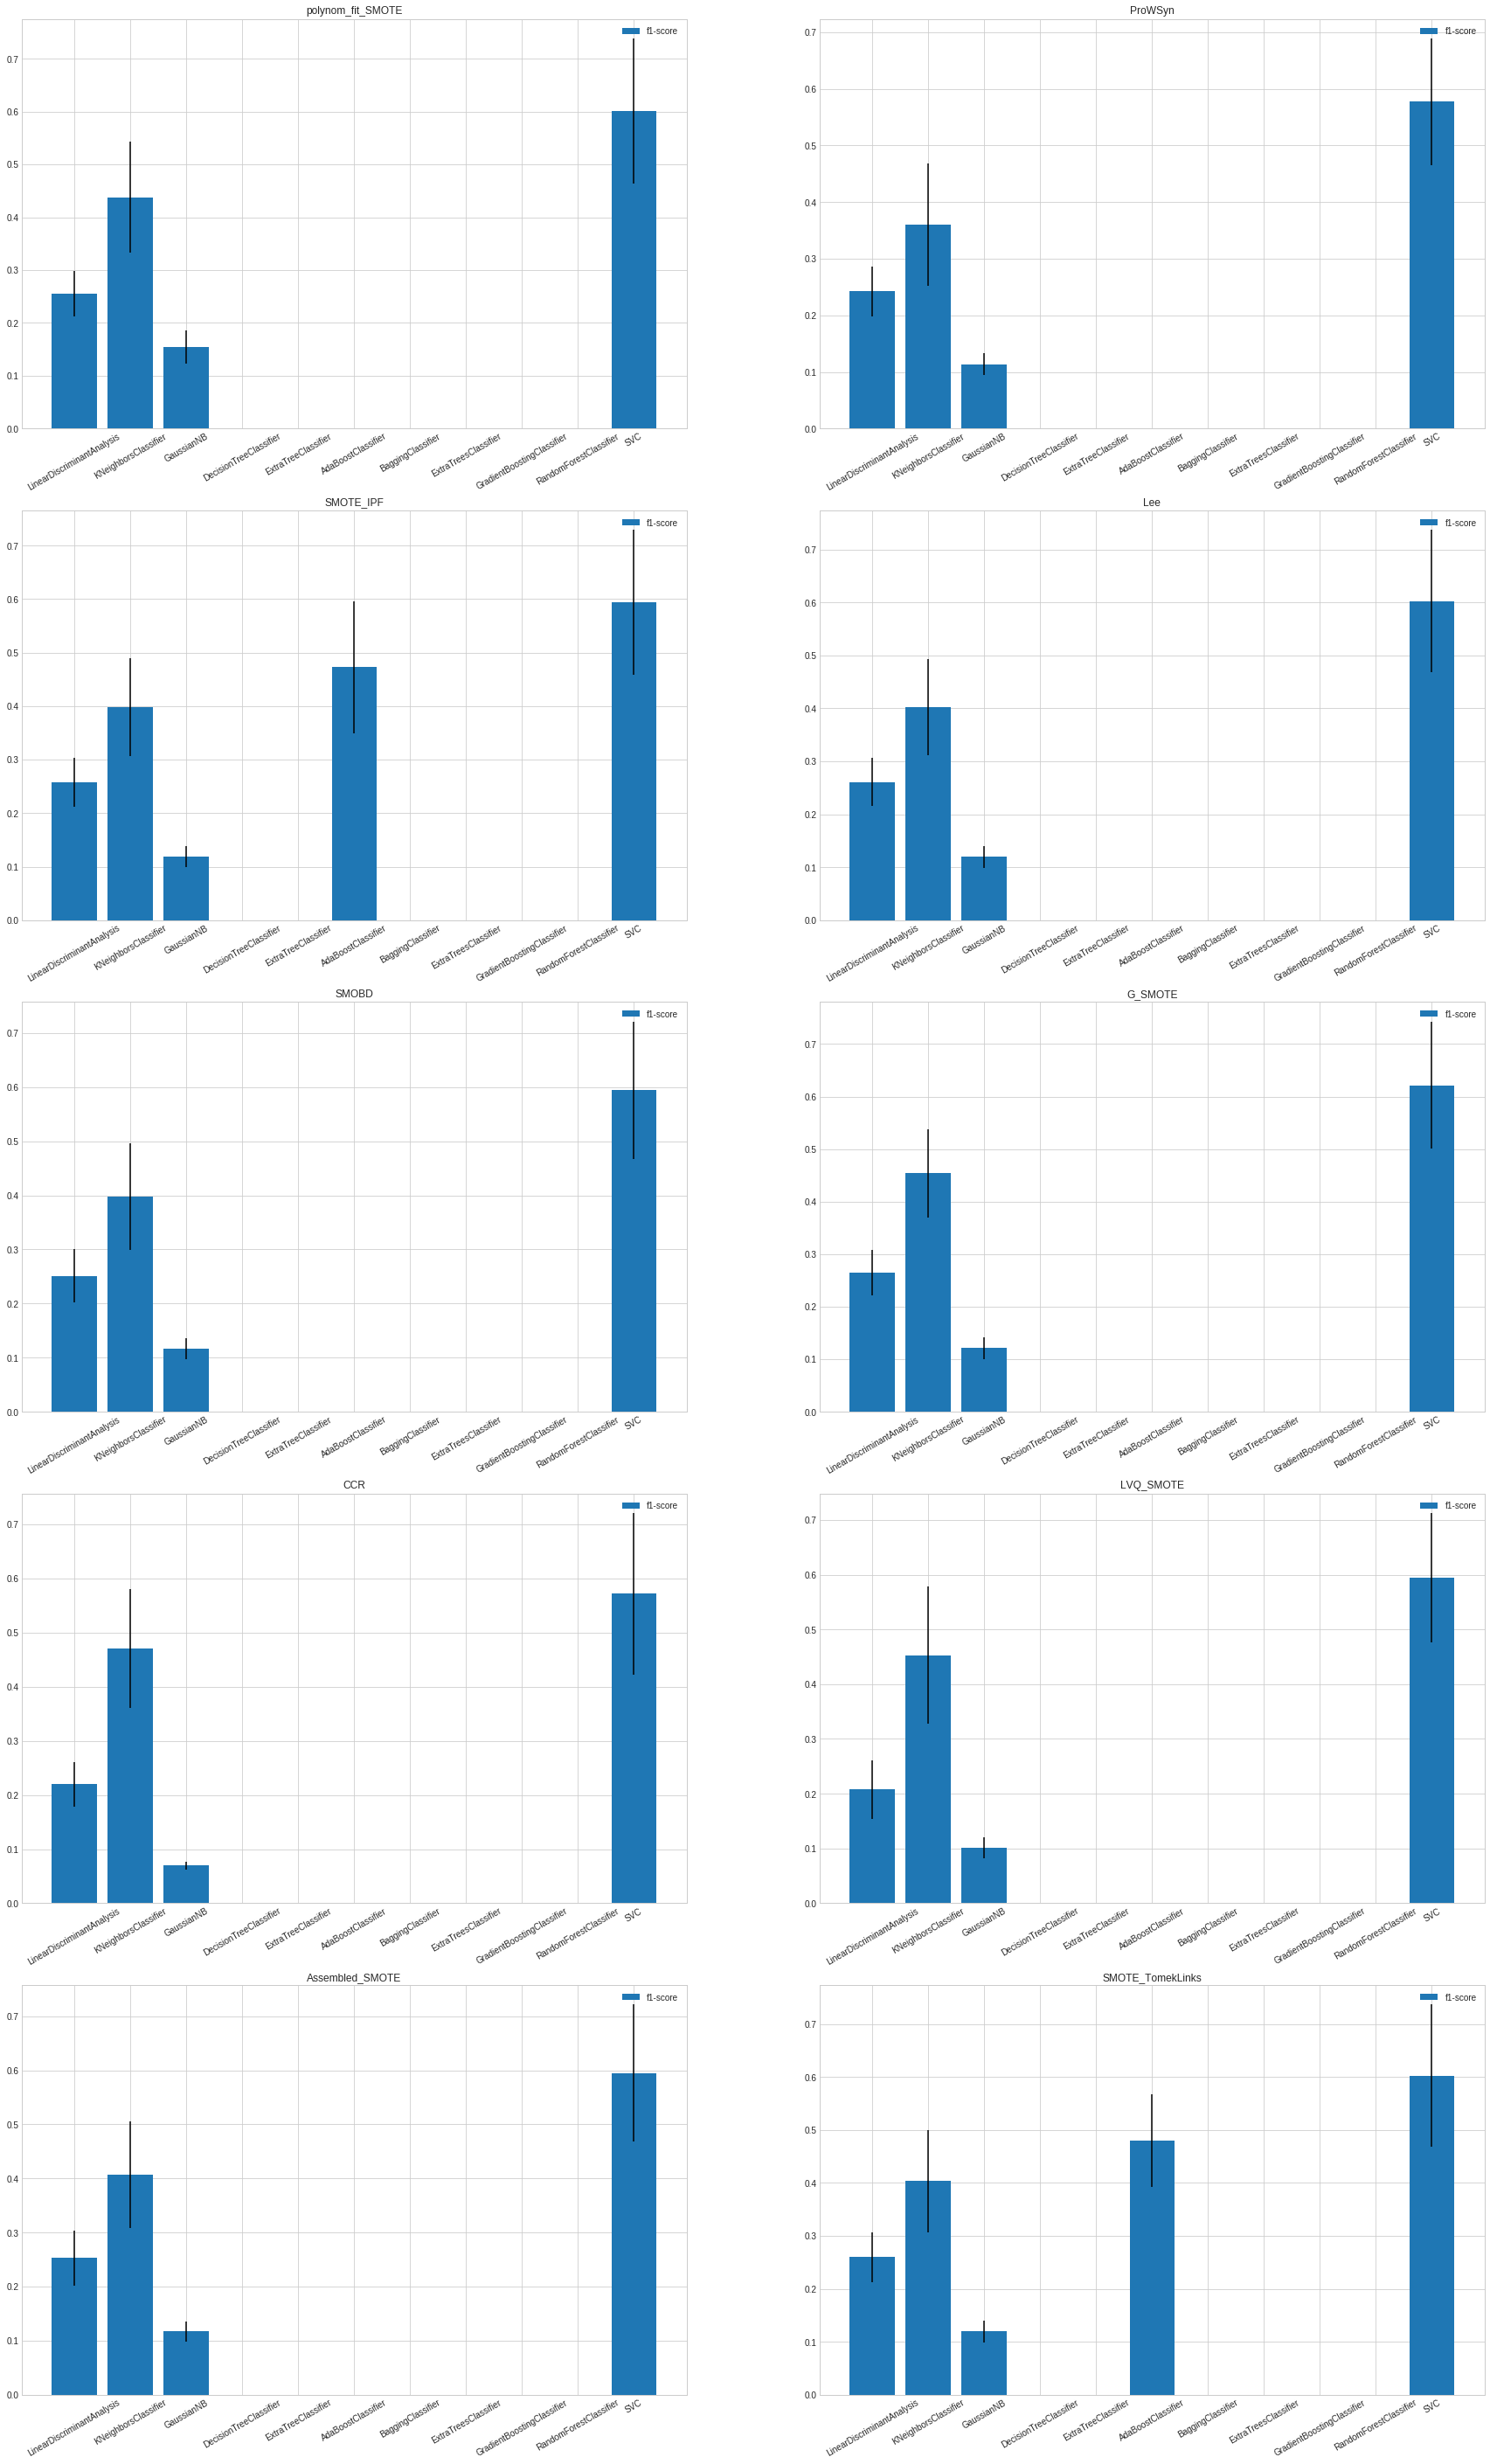

In [12]:
from src.utils.visualization import plot_trues
plt.rcParams["figure.figsize"] = (30,50)

for i, bar_plot in enumerate(bar_plots):
    name = bar_plot
    bar_plot = bar_plots[name]
    plt.subplot(5,2,i+1)
    plt.title(name)
    
    tp_tfs, tp_tfs_err, tps, tps_err, f1s, f1s_err = extract_statistics(bar_plot)
    
    x = np.arange(len(f1s))
    plt.bar(x, f1s, yerr=f1s_err, label='f1-score')

    plt.xticks(x, labels, rotation=30)
    plt.legend()
    i_max = np.argmax(f1s)
    
    labels = [e[0] for e in bar_plot[0]]

    print(f'{name} ({labels[i_max]}):', f1s[i_max], '+/-' ,f1s_err[i_max])